# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Equalização-do-Histograma-utilizando-o-conceito-de-distribuição-uniforme-desejada" data-toc-modified-id="Equalização-do-Histograma-utilizando-o-conceito-de-distribuição-uniforme-desejada-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equalização do Histograma utilizando o conceito de distribuição uniforme desejada</a></div><div class="lev2 toc-item"><a href="#Imagem-original" data-toc-modified-id="Imagem-original-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imagem original</a></div><div class="lev2 toc-item"><a href="#Ilustração-com-caso-numérico" data-toc-modified-id="Ilustração-com-caso-numérico-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ilustração com caso numérico</a></div><div class="lev2 toc-item"><a href="#Referências:" data-toc-modified-id="Referências:-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Referências:</a></div>

# Equalização do Histograma utilizando o conceito de distribuição uniforme desejada

Uma outra forma de equacionar o problema de equalizar a distribuição dos pixels
de uma imagem é supor que você tem um conjunto de pixels do tamanho da imagem
onde a distribuição de pixels seja uniforme.

Pensando num modelo simplificado, imagine que se deseja reproduzir
uma fotografia num mosaico construído de ladrilhos onde existe o conjunto de ladrilhos para
serem usados. Neste caso da equalização, existe um mesmo número de ladrilhos
para cada tom de cinza.

Qual é o procedimento para montar o mosaico e saber exatamente onde se coloca
cada ladrilho no mosaico? Existe uma esquema simples e intuitivo:

1. Verifica-se o tom de cinza de cada ponto na imagem e anota qual é a sua posição
   no mosaico.
2. Ordena todos os tons de cinza da fotografia.
3. Ordena todos os tons de cinza dos ladrilhos.
4. Usa o primeiro conjunto de ladrilhos mais escuros e coloca-os nas posições
   do tons de cinza mais escuros da fotografia.
5. Continua com o processo anterior até utilizar todos os ladrilhos.

Podemos fazer o mesmo procedimento de forma computacional, de forma muito mais
eficiente, porém usando o mesmo princípio.

Usamos aqui a indexação por arrays, trabalhando sempre com a indexação do
array de forma linearizada. ``f.ravel()`` é a visão da imagem de forma linearizada.

## Imagem original

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
sys.path.append( '../master' )
from function import normalize
from function import histogram

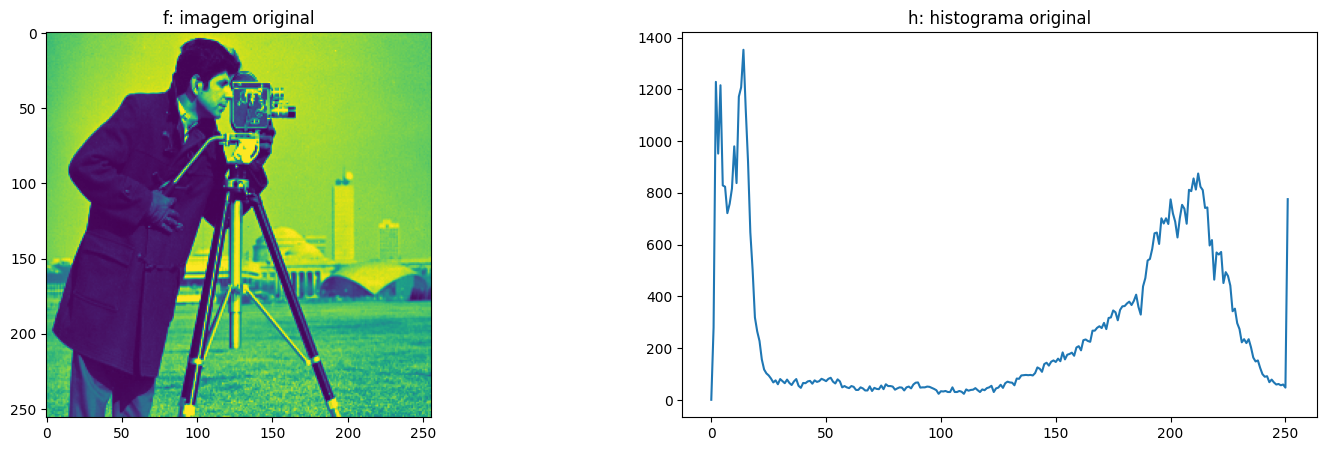

In [23]:
fig, axs = plt.subplots(1,2, figsize=(18, 5))

plt.subplot(121)
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f),plt.title('f: imagem original')
plt.subplot(122)
plt.plot(histogram.histogram(f)),plt.title('h: histograma original');

Ordena os pixels da imagem original, sabendo-se seu endereço (posição em ``fsi``).
Isto é obtido com a função ``argsort``. Veja como se usa o ``argsort``: `tutorial_numpy_argsort argsort`.

(<matplotlib.image.AxesImage at 0x7f7daa8abee0>,
 Text(0.5, 1.0, 'fsi:endereço na imagem original'))

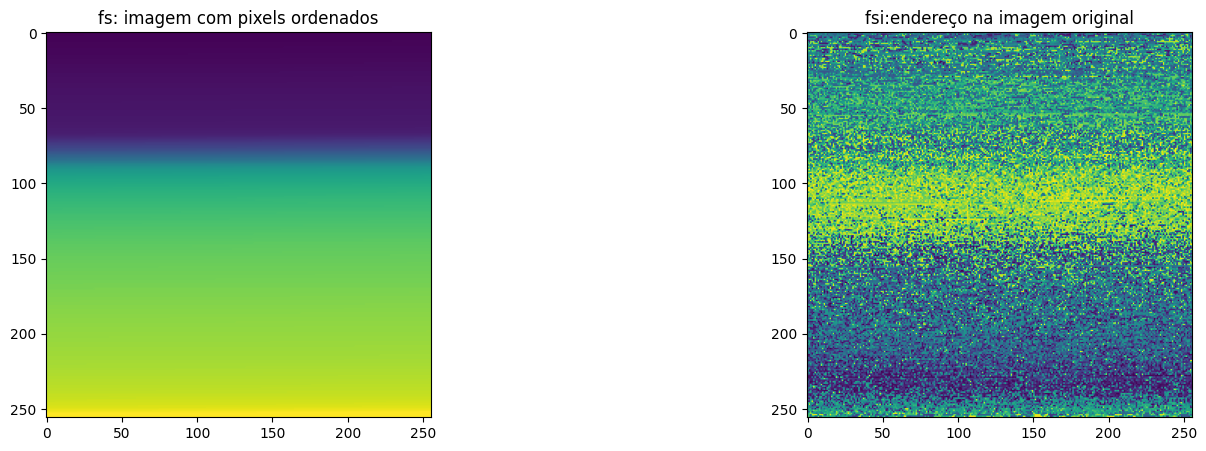

In [24]:
fig, axs = plt.subplots(1,2, figsize=(18, 5))

plt.subplot(121)
fsi = np.argsort(f.ravel())
fs = (f.ravel()[fsi]).reshape(f.shape)
plt.imshow(fs),plt.title('fs: imagem com pixels ordenados')
plt.subplot(122)
plt.imshow(normalize.normalize(fsi.reshape(f.shape))),plt.title('fsi:endereço na imagem original')

Cria uma imagem de mesmas dimensões, porém com os pixels ordenados e com
distribuição uniforme de tons de cinza. Usamos a função ``linspace`` e
depois damos ``reshape`` na imagem para ficar bidimensional. Estes são os ladrilhos
disponíveis:

(<matplotlib.image.AxesImage at 0x7f7daa792e90>,
 Text(0.5, 1.0, 'gs: distribuição uniforme, pixels ordenados'))

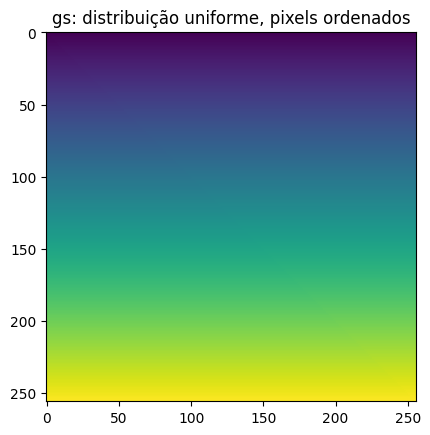

In [25]:
gs = np.linspace(0,255,f.size).astype(np.uint8)
plt.imshow(gs.reshape(f.shape)),plt.title( 'gs: distribuição uniforme, pixels ordenados')

Agora temos a imagem original ordenada e os tons de cinza uniformemente
distribuídos, também ordenados:

(<matplotlib.image.AxesImage at 0x7f7daa62f4c0>,
 Text(0.5, 1.0, 'gs: distribuição uniforme desejada, pixels ordenados'))

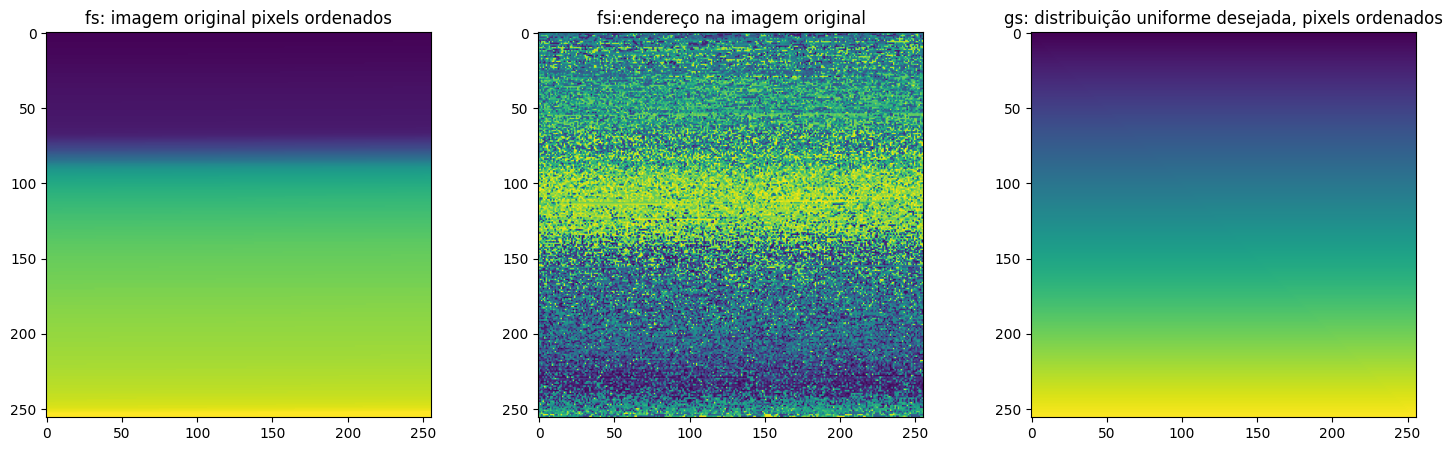

In [26]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(fs),plt.title('fs: imagem original pixels ordenados')

plt.subplot(132)
plt.imshow(normalize.normalize(fsi.reshape(f.shape))),plt.title('fsi:endereço na imagem original')

plt.subplot(133)
plt.imshow(gs.reshape(f.shape)),plt.title('gs: distribuição uniforme desejada, pixels ordenados')

Como sabemos o endereço original destes pixels, pois são indicados pelo
``argsort`` feito acima, podemos agora atribuir os pixels ordenados para os
pixels ordenados da imagem uniforme.

In [27]:
g = np.empty( (f.size,), np.uint8)
g[fsi] = gs

Pronto, o mosaico está montado e a image g está equalizada.

(<matplotlib.image.AxesImage at 0x7f7daa55f1c0>,
 Text(0.5, 1.0, 'g[fsi] = gs, imagem equalizada'))

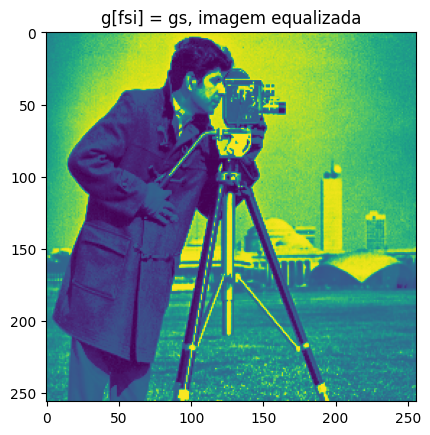

In [28]:
plt.imshow(g.reshape(f.shape)),plt.title('g[fsi] = gs, imagem equalizada')

Para mostrar o seu histograma e comprovar a equalização feita:

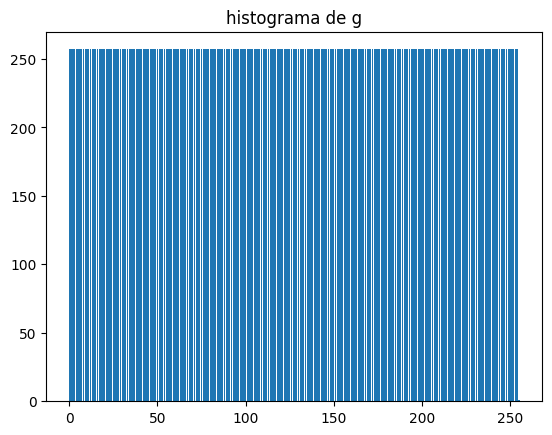

In [29]:
h = histogram.histogram(g)
plt.bar( np.arange(h.size), h)
plt.title('histograma de g');

## Ilustração com caso numérico

Para facilitar o entendimento, é repetido a seguir o mesmo procedimento acima, porém
com uma imagem numérica de uma dimensão com 16 pixels de valores entre 0 a 7.
Fazendo a analogia com a construção do mosaico, existem 2 pastilhas de cada tom de cinza
entre 0 a 7 para construir o mosaico com 16 pastilhas.

Calculando a imagem ordenada de ``f`` e o endereço dos pixels ``fsi`` para ordenar ``f``:

In [30]:
f = np.array([1, 7, 3, 0, 2, 2, 4, 3, 2, 0, 5, 3, 7, 7, 7, 5])
h = histogram.histogram(f)
fsi = np.argsort(f)
fs = f[fsi]
print('imagem original      f  :',f)
print('indices para ordenar fsi:',fsi)
print('f c/pixels ordenados fs :',fs)
print('histogram h:          h :',h)

imagem original      f  : [1 7 3 0 2 2 4 3 2 0 5 3 7 7 7 5]
indices para ordenar fsi: [ 3  9  0  4  5  8  2  7 11  6 10 15  1 12 13 14]
f c/pixels ordenados fs : [0 0 1 2 2 2 3 3 3 4 5 5 7 7 7 7]
histogram h:          h : [2 1 3 3 1 2 0 4]


Pastilhas disponíveis para o mosaico: 2 pastilhas de cada tom de cinza:   

In [31]:
gs = np.linspace(0,7,f.size).round(0).astype(np.int16)
print('ladrilhos ordenados, gs :', gs)

ladrilhos ordenados, gs : [0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7]


Mapeando as pastilhas no mosaico final (``gs``), utilizando o endereço dos pixels ``fsi``:

In [32]:
print('ladrilhos disponíveis                gs:',gs)
print('endereço para colocar cada ladrilho fsi:',fsi)
g = np.empty( (f.size,), np.uint8)
g[fsi] = gs
print('mosaico montado             g[fsi] = gs:',g)

ladrilhos disponíveis                gs: [0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7]
endereço para colocar cada ladrilho fsi: [ 3  9  0  4  5  8  2  7 11  6 10 15  1 12 13 14]
mosaico montado             g[fsi] = gs: [1 6 3 0 1 2 4 3 2 0 5 4 6 7 7 5]


Para entender como ``g[fsi]=gs`` é calculado, veja as atribuições elemento a elemento:

In [33]:
print('g[fsi]= gs')
for i in np.arange(g.size):
    print('g[%d] = %d' % (fsi[i],gs[i]))

g[fsi]= gs
g[3] = 0
g[9] = 0
g[0] = 1
g[4] = 1
g[5] = 2
g[8] = 2
g[2] = 3
g[7] = 3
g[11] = 4
g[6] = 4
g[10] = 5
g[15] = 5
g[1] = 6
g[12] = 6
g[13] = 7
g[14] = 7


Imagem original e com histograma equalizado (mosaico):    

In [34]:
print('imagem usando os ladrilhos g:',g)
print('imagem original:           f:',f)

imagem usando os ladrilhos g: [1 6 3 0 1 2 4 3 2 0 5 4 6 7 7 5]
imagem original:           f: [1 7 3 0 2 2 4 3 2 0 5 3 7 7 7 5]


Histograma da imagem equalizada (mosaico):

In [36]:
print('histograma de g:', histogram.histogram(g))

histograma de g: [2 2 2 2 2 2 2 2]


## Referências:

- [NumPy ravel](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)
- [NumPy argsort](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html)